#IMPORT AND SETUPS

In [ ]:

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator



getting the dataset

In [ ]:
!unzip '/content/drive/MyDrive/Machine learning dataset/CK+ Dataset/archive.zip'

Archive:  /content/drive/MyDrive/Machine learning dataset/CK+ Dataset/archive.zip
  inflating: ckextended.csv          


In [ ]:
data = pd.read_csv('/content/ckextended.csv')
data.head()

,emotion,pixels,Usage
0,6,36 39 35 25 19 11 8 7 3 13 15 9 21 57 75 90 10...,Training
1,6,88 74 19 4 5 5 3 12 8 21 15 21 15 18 24 29 32 ...,Training
2,6,9 2 4 7 1 1 1 0 7 29 49 76 115 141 156 169 177...,Training
3,6,104 106 108 104 95 50 60 61 58 83 126 133 139 ...,Training
4,6,68 72 67 67 6 2 1 1 1 1 1 14 24 24 38 65 79 94...,Training


In [ ]:
from skimage.transform import resize
from skimage.color import gray2rgb

#create a new colume 'image_array,
#for each image, reshape its pixels into a (48 * 48) shape
#the values hould be floating points
data['image_array'] = data['pixels'].apply(lambda x: np.reshape(
    x.split(' '), (48,48)).astype(np.float32)
    )
data.head()


,emotion,pixels,Usage,image_array
0,6,36 39 35 25 19 11 8 7 3 13 15 9 21 57 75 90 10...,Training,"[[36.0, 39.0, 35.0, 25.0, 19.0, 11.0, 8.0, 7.0..."
1,6,88 74 19 4 5 5 3 12 8 21 15 21 15 18 24 29 32 ...,Training,"[[88.0, 74.0, 19.0, 4.0, 5.0, 5.0, 3.0, 12.0, ..."
2,6,9 2 4 7 1 1 1 0 7 29 49 76 115 141 156 169 177...,Training,"[[9.0, 2.0, 4.0, 7.0, 1.0, 1.0, 1.0, 0.0, 7.0,..."
3,6,104 106 108 104 95 50 60 61 58 83 126 133 139 ...,Training,"[[104.0, 106.0, 108.0, 104.0, 95.0, 50.0, 60.0..."
4,6,68 72 67 67 6 2 1 1 1 1 1 14 24 24 38 65 79 94...,Training,"[[68.0, 72.0, 67.0, 67.0, 6.0, 2.0, 1.0, 1.0, ..."


#Processing the images

1. First we create a new column 'Image', then use
the resize function to resize each image to the desired output shape.

2. For each image array, divide each pixel by 256(this will make data processing easier) then apply gray2rgb function to it. **gray2rgb** creates an RGB representation of a gray-level image.

the output shape is (224,224)

In [ ]:

data['Image'] = data['image_array'].apply(lambda x: resize(gray2rgb(x/256), (224,224)))

#data['Images'] = data['Image'].apply(lambda x: tf.convert_to_tensor(x))
data.head()

,emotion,pixels,Usage,image_array,Image
0,6,36 39 35 25 19 11 8 7 3 13 15 9 21 57 75 90 10...,Training,"[[36.0, 39.0, 35.0, 25.0, 19.0, 11.0, 8.0, 7.0...","[[[0.1452836, 0.1452836, 0.1452836], [0.144416..."
1,6,88 74 19 4 5 5 3 12 8 21 15 21 15 18 24 29 32 ...,Training,"[[88.0, 74.0, 19.0, 4.0, 5.0, 5.0, 3.0, 12.0, ...","[[[0.30456293, 0.30456293, 0.30456293], [0.328..."
2,6,9 2 4 7 1 1 1 0 7 29 49 76 115 141 156 169 177...,Training,"[[9.0, 2.0, 4.0, 7.0, 1.0, 1.0, 1.0, 0.0, 7.0,...","[[[0.022879465, 0.022879465, 0.022879465], [0...."
3,6,104 106 108 104 95 50 60 61 58 83 126 133 139 ...,Training,"[[104.0, 106.0, 108.0, 104.0, 95.0, 50.0, 60.0...","[[[0.40964803, 0.40964803, 0.40964803], [0.408..."
4,6,68 72 67 67 6 2 1 1 1 1 1 14 24 24 38 65 79 94...,Training,"[[68.0, 72.0, 67.0, 67.0, 6.0, 2.0, 1.0, 1.0, ...","[[[0.27483258, 0.27483258, 0.27483258], [0.271..."


Lets look at the 10th image

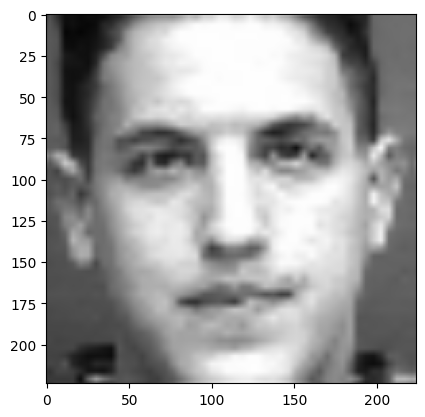

In [ ]:
plt.imshow(data['Image'][9])

# Splitting the dataset into training and testing

In [ ]:
cols= {'emotion','Image'}
df = data.loc[:,cols].copy()
df.head()

<ipython-input-9-b925becb7d50>:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df = data.loc[:,cols].copy()


,Image,emotion
0,"[[[0.1452836, 0.1452836, 0.1452836], [0.144416...",6
1,"[[[0.30456293, 0.30456293, 0.30456293], [0.328...",6
2,"[[[0.022879465, 0.022879465, 0.022879465], [0....",6
3,"[[[0.40964803, 0.40964803, 0.40964803], [0.408...",6
4,"[[[0.27483258, 0.27483258, 0.27483258], [0.271...",6


In [ ]:
df.shape, data.shape

((920, 2), (920, 5))

In [ ]:
from sklearn.model_selection import train_test_split

X = df['Image'].to_numpy()  #features
y = df['emotion'].to_numpy() #label

X_train, test_images, y_train, test_labels = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2023)
X_train.shape, test_images.shape, y_train.shape, test_labels.shape


((736,), (184,), (736,), (184,))

create validation dataset

In [ ]:
train_images, val_images, train_labels, val_labels =  train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=2023)
train_images.shape, val_images.shape, train_labels.shape, val_labels.shape

((588,), (148,), (588,), (148,))

Now we have three datasets:
* training: train_images, train_labels
* validation: val_images, val_labels
* testing = test_inages, test_labels

In [ ]:
test_images.shape[0] + train_images.shape[0] + val_images.shape[0]

920

In [ ]:
import os

path = 'facial_expression'
os.mkdir(path)

#this are the directopriess containing the datasets
train_dir = os.path.join(path, 'train')
val_dir = os.path.join(path, 'validation')
test_dir = os.path.join(path, 'test')

dirs = ['train_dir','val_dir','test_dir']

for dir in dirs:

  if not os.path.exists(dir):
    os.mkdirs(dir)




In [ ]:
emotions =[0,1,2,3,4,5,6,7]

#train_dir
parent_dir = 'train_dir'

for emotion in emotions:


In [ ]:

img_height = 224
img_width = 224

# Building the model

The labels Emotions are defined as determined index below:

* 0 : Anger (45 samples)
* 1 : Disgust (59 samples)
* 2 : Fear (25 samples)
* 3 : Happiness (69 samples)
* 4 : Sadness (28 samples)
* 5 : Surprise (83 samples)
* 6 : Neutral (593 samples)
* 7 : Contempt (18 samples)


In [ ]:
class_names = ['Anger', 'Digust','Fear','Happiness','Sadness',
               'Surprise', 'Neutral', 'Comtempt']
num_classes = len(class_names)
print(num_classes)

8


In [ ]:

num_classes = len(class_names)

model = Sequential([
  #layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=((img_height, img_width, 3))),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:

train_images= np.array([np.array(val) for val in train_images])
train_labels= np.array([np.array(val) for val in train_labels])
val_images= np.array([np.array(val) for val in val_images])
val_labels= np.array([np.array(val) for val in val_labels])


In [ ]:
print(type(train_images))

<class 'numpy.ndarray'>


In [ ]:
model.compile(
    #this are the default or base loss function and opti;izer for classification
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

history = model.fit(train_images, train_labels, epochs =10,
                    validation_data = (val_images, val_labels ))

#Evaluating the Model
We can determine how well the model performed by looking at it's performance on the test data set.

In [ ]:
test_images= np.array([np.array(val) for val in test_images])
test_images= np.array([np.array(val) for val in test_images])

test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose =2)
print(test_accuracy)

6/6 - 0s - loss: 0.4402 - accuracy: 0.8478 - 388ms/epoch - 65ms/step
0.8478260636329651


**84.7%** is not bad for a first try. Feel free to play with the model and try to increase the accuracy

# MAKING PREDICTIONS

create a function that takes a number as input. The number is used as index and an imjage is returned from the dataset. Our model will predict the class of the selecte image. Finally the image will be plotted, along with the model's predicted class and the actual class

Pick a number: 145
1/1 [==============================] - 0s 19ms/step


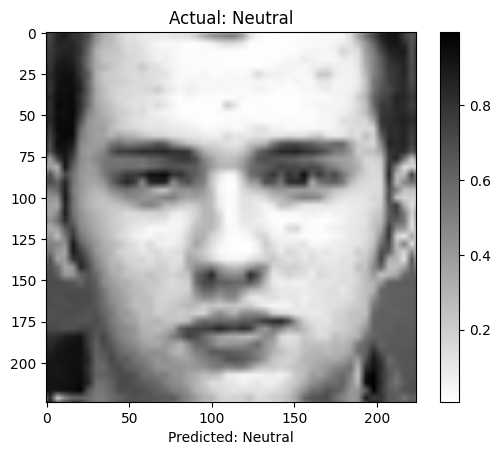

In [ ]:
COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['Anger', 'Digust','Fear','Happiness','Sadness',
               'Surprise', 'Neutral', 'Comtempt']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Actual: " + label)
  plt.xlabel("Predicted: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
#image = test_images[num]
#label = test_labels[num]

image = data['Image'][num]
label = data['emotion'][num]
predict(model, image, label)
